In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

# import the non-gaussianity extension
from nongaussianity_ext import *

seed    = 42
ns      = 6
nocc    = ns // 2
la      = ns // 2
lb      = ns - la
dimA    = 2**(la)
dimB    = 2**(lb)
ordered = True
rng     = np.random.default_rng(seed=seed)

logger.info(f"Creating the system of Ns={ns} orbitals, Nocc={nocc}. Subsystem: La={la}, Lb={lb}", lvl=0, color='blue')

Current working directory: /home/klimak/Codes/QuantumEigenSolver/Python/projects/2025/nongaussianity
Module path: /home/klimak/Codes/QuantumEigenSolver/Python/projects/2025/nongaussianity/nongaussianity_ext.py
QES path: /home/klimak/Codes/QuantumEigenSolver/Python
Library path: /home/klimak/Codes/QuantumEigenSolver/Python/QES 
	With folders: ['ultrametric_energy_width.png', 'Solver', '__pycache__', 'NQS', 'general_python', '__init__.py', 'Algebra', 'ultrametric_energy_width_small.png']
20_08_2025_17-44_08 [INFO] Log file created: ./log/QES_20_08_2025_17-44_08.log
20_08_2025_17-44_08 [INFO] Log level set to: info
20_08_2025_17-44_08 [INFO] ############Global logger initialized.############
20_08_2025_17-44_08 [INFO] JAX is not available. Using NumPy as the active backend.
20_08_2025_17-44_08 [INFO] **************************************************
20_08_2025_17-44_08 [INFO] Backend Configuration:
20_08_2025_17-44_08 [INFO] 		NumPy Version: 1.26.4
20_08_2025_17-44_08 [INFO] 		SciPy Vers

20_08_2025_17-44_09 [INFO] 	->[SYK2] Building Hamiltonian (Type: Quadratic)...
20_08_2025_17-44_09 [INFO] 		->[SYK2] Initialization completed in 0.000021 seconds
20_08_2025_17-44_09 [INFO] 		->[SYK2] Building SYK2 Hamiltonian...
20_08_2025_17-44_09 [INFO] 	->[SYK2] Hamiltonian matrix built in 0.000255 seconds.
Hamiltonian: SYK2(ns=6,cpx=False)


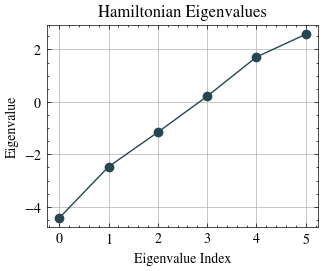

array([-4.42760348, -2.47219687, -1.15533797,  0.21518198,  1.71310165,
        2.57996806])

In [2]:
hamil = create_hamiltonian(
    ns          = ns,
    model_type  = ModelHamiltonians.SYK2,
    # model_type  = ModelHamiltonians.FreeFermions,
    # model_type  = ModelHamiltonians.AubryAndre,
    t           = 1.0,
    seed        = seed,
    dtype       = np.float64,
    J           = 1.0,
    lmbd        = 0.5,
    beta        = 1.0 / np.sqrt(2.0)
)
hamil.build(verbose=True, use_numpy=True)
hamil.diagonalize()
print(f"Hamiltonian: {hamil}")
plt.plot(np.arange(hamil._nh), np.real(hamil.eig_val), marker='o')
plt.xlabel("Eigenvalue Index")
plt.ylabel("Eigenvalue")
plt.title("Hamiltonian Eigenvalues")
plt.grid()
plt.show()

hamil.eig_val

In [3]:
arrangement         = range(ns) # orbitals 0..Ns-1
o_en                = choose_orbitals(  arrangement     = arrangement, 
                                        filling         = nocc,
                                        hamil           = hamil,
                                        number          = 5 if hamil.ns > 10 else None,
                                        e_window        = None,
                                        rng             = rng,
                                        constraints     = [q_constraint(hamil.ns, 0.0, 1e-5)] if isinstance(hamil, free_fermions.FreeFermions) else [],
                                    )

o_en, len(o_en)

([(array([0, 1, 2]), -8.055138320444703),
  (array([0, 1, 3]), -6.684618366119191),
  (array([0, 1, 4]), -5.1866987023582025),
  (array([0, 1, 5]), -4.319832287830802),
  (array([0, 2, 3]), -5.367759470414504),
  (array([0, 2, 4]), -3.8698398066535153),
  (array([0, 2, 5]), -3.0029733921261146),
  (array([0, 3, 4]), -2.4993198523280036),
  (array([0, 3, 5]), -1.6324534378006028),
  (array([0, 4, 5]), -0.13453377403961397),
  (array([1, 2, 3]), -3.4123528595699564),
  (array([1, 2, 4]), -1.9144331958089678),
  (array([1, 2, 5]), -1.0475667812815668),
  (array([1, 3, 4]), -0.543913241483456),
  (array([1, 3, 5]), 0.322953173043945),
  (array([1, 4, 5]), 1.8208728368049336),
  (array([2, 3, 4]), 0.7729456542212316),
  (array([2, 3, 5]), 1.6398120687486326),
  (array([2, 4, 5]), 3.1377317325096215),
  (array([3, 4, 5]), 4.508251686835133)],
 20)

In [4]:
start_block     = time.time()
transform_pc    = prepare_trans_mat_orbitals(hamil, occ=la, ordered=ordered)
W, W_A, W_A_CT  = transform_pc.W, transform_pc.W_A(), transform_pc.W_A_CT()
logger.info(f"Shape of W: {W.shape}, dtype: {W.dtype}", lvl=2)
logger.info(f"Shape of W_A: {W_A.shape}", lvl=3)
logger.info(f"Shape of W_A_CT: {W_A_CT.shape}", lvl=3)
logger.info(f"Execution time: {time.time() - start_block:.4e} seconds", lvl=3, color = 'yellow')

20_08_2025_17-44_10 [INFO] 		->Shape of W: (6, 6), dtype: float64
20_08_2025_17-44_10 [INFO] 			->Shape of W_A: (6, 3)
20_08_2025_17-44_10 [INFO] 			->Shape of W_A_CT: (3, 6)
20_08_2025_17-44_10 [INFO] 			->Execution time: 1.1046e-03 seconds


In [5]:
# Performance measurement
start_total             = time.time()

# test the extractor
if ns < 4:
    # Generate a random mask for the lattice positions
    if ordered:
        mask_a              = np.arange(la)
    else:
        mask_a              = np.sort(rng.choice(np.arange(hamil.ns), la, replace=False))
        
    mask_b                  = np.setdiff1d(np.arange(hamil.ns), mask_a)
    order                   = tuple(mask_a) + tuple(mask_b)
    mask_a_onehot           = Extractor.to_one_hot(mask_a, hamil.ns)
    mask_b_onehot           = Extractor.to_one_hot(mask_b, hamil.ns)
    
    # tester
    state_to_extract        = rng.integers(0, 2**hamil.ns)
    state_to_extract_str    = int2binstr(state_to_extract, hamil.ns)
    state_to_extract_col    = Extractor.colorize_extractor(state_to_extract_str, mask_a, mask_b, logger)
    start_block             = time.time()
    #
    mask_a_extractor        = Extractor.make_extractor(mask_a, size=hamil.ns, backend='numba_vnb')
    mask_b_extractor        = Extractor.make_extractor(mask_b, size=hamil.ns, backend='numba_vnb')
    state_ext_a             = mask_a_extractor(state_to_extract)
    state_ext_b             = mask_b_extractor(state_to_extract)
    
    logger.info(f"Mask for the lattice positions on A: {mask_a}", lvl=0)
    logger.info(f"Mask for the lattice positions on A (one-hot): {mask_a_onehot}", lvl=1)
    logger.info(f"Mask for the lattice positions on B: {mask_b}", lvl=0)
    logger.info(f"Mask for the lattice positions on B (one-hot): {mask_b_onehot}", lvl=1)
    logger.info(f"Order of the mask: {order}", lvl=1)
    logger.title("Small test", desired_size=50, fill='+', color='green')
    logger.info(f"State to extract: {state_to_extract}:{state_to_extract_col}", lvl=1)
    logger.info(f"Mask for the lattice positions on A (extracted): {state_ext_a}:{int2binstr(state_ext_a, nocc)}", lvl=2, color='green')
    logger.info(f"Mask for the lattice positions on B (extracted): {state_ext_b}:{int2binstr(state_ext_b, hamil.ns - nocc)}", lvl=2, color='white')
    logger.info(f"Execution time: {time.time() - start_block:.4e} seconds", lvl=2)
    logger.title("Finished", desired_size=50, fill='+', color='green')

# # Initialize lists to store results
# entropies_correlation   = []
# entropies_many_body     = []

num_samples     = len(o_en)
entropies       = []
entropies_mb    = []
for ii, (comb, en) in enumerate(o_en):
    logger.info(f"Processing sample {ii + 1}/{num_samples}, E={en:.3f}", lvl=1, color='red')
    comb_one_hot            = to_one_hot(comb, hamil.ns)
    start_block             = time.time()
    correlation_matrix      = prepare_corr_matrix_sp(W_A=W_A, W_A_CT=W_A_CT, occ=comb_one_hot)
    print(f"Shape of the correlation matrix: {correlation_matrix.shape}")
    start_block_2           = time.time()
    
    # diagonalize the correlation matrix
    corr_val, _             = np.linalg.eigh(correlation_matrix)
    entropy_correlation     = Entropy.entropy(corr_val, typek=Entropy.Entanglement.SINGLE)
    entropies.append(entropy_correlation)
    logger.info(f"Entropy from single-particle correlation: {entropy_correlation:.4e}", lvl=2, color='green')
    logger.info(f"Execution time: {time.time() - start_block:.4e} seconds", lvl=3, color='yellow')
    logger.info(f"Execution time for correlation matrix calculation: {start_block_2 - start_block:.4e} seconds", lvl=4, color='yellow')

    if hamil.ns <= 10:
        start_block             = time.time()
        many_body_state         = hamil.many_body_state(occupied_orbitals=comb)
        start_block_2           = time.time()
        schmidt_values          = Dens.schmidt_numpy(many_body_state, dimA = dimA, dimB = dimB, eig = False)[0]
        entropy_many_body       = Entropy.vn_entropy(schmidt_values)
        entropies_mb.append(entropy_many_body)
        logger.info(f"Entropy from many-body state: {entropy_many_body:.4e}", lvl=2, color='blue')
        logger.info(f"Execution time: {time.time() - start_block:.4e} seconds", lvl=3, color='yellow')
        logger.info(f"Execution time for many body state preparation: {start_block_2 - start_block:.4e} seconds", lvl=4, color='yellow')
        logger.info(f"Execution time for density matrix calculation: {time.time() - start_block_2:.4e} seconds", lvl=4, color='yellow')

    if hamil.ns <= 10:
        # correlation matrix from many-body state
        correlation_matrix_mb   = Corr.corr_from_statevector(many_body_state, ns=hamil.ns, subtract_identity=True)
        correlation_matrix_mb   = (correlation_matrix_mb[:la, :la])  # ensure it's real
        
        # diagonalize the correlation matrix
        corr_val, _             = np.linalg.eigh(correlation_matrix_mb)
        purity                  = np.sum(corr_val**2)
        fourth_moment           = np.sum(corr_val**4)
        sixth_moment            = np.sum(corr_val**6)
        entropy_correlation_mb  = Entropy.entropy(corr_val, typek=Entropy.Entanglement.SINGLE)
        entropies_mb.append(entropy_correlation_mb)
        
        logger.info(f"Entropy from many-body correlation: {entropy_correlation_mb:.4e}", lvl=2, color='purple')
        NG, gaussianity, purity, m4, m6 = nongaussianity(eigvals=corr_val, return_stats=True)
        logger.info(f"Nongaussianity: {NG:.4e}, Gaussianity: {gaussianity:.4e}, Purity: {purity:.4e}, M4: {m4:.4e}, M6: {m6:.4e}", lvl=2, color='purple')

20_08_2025_17-44_10 [INFO] 	->Processing sample 1/20, E=-8.055
Shape of the correlation matrix: (3, 3)
20_08_2025_17-44_10 [INFO] 		->Entropy from single-particle correlation: 8.5242e-01
20_08_2025_17-44_10 [INFO] 			->Execution time: 4.1137e-03 seconds
20_08_2025_17-44_10 [INFO] 				->Execution time for correlation matrix calculation: 1.5144e-03 seconds
20_08_2025_17-44_10 [INFO] 		->Entropy from many-body state: 8.5242e-01
20_08_2025_17-44_10 [INFO] 			->Execution time: 1.3528e-02 seconds
20_08_2025_17-44_10 [INFO] 				->Execution time for many body state preparation: 7.7956e-03 seconds
20_08_2025_17-44_10 [INFO] 				->Execution time for density matrix calculation: 6.1958e-03 seconds
20_08_2025_17-44_11 [INFO] 		->Entropy from many-body correlation: 8.5242e-01
20_08_2025_17-44_11 [INFO] 		->Nongaussianity: 8.5242e-01, Gaussianity: 4.0612e-01, Purity: 6.2966e-01, M4: 5.5748e-01, M6: 5.1473e-01
20_08_2025_17-44_11 [INFO] 	->Processing sample 2/20, E=-6.685
Shape of the correlation matr

In [31]:
# number of states to mix
gamma       = 3

# number of realizations taken from the combinations
n_realiz    = 1

# arrangement of the eigenstates
logger.info(f"Mixing gamma={gamma} states from {len(o_en)} many-body orbitals", lvl=2, color='red')
o_arrange   = np.arange(len(o_en))
rng.shuffle(o_arrange)  # shuffle the arrangement to get different combinations
o_combs     = itertools.combinations(o_arrange, gamma)
for ii, comb_indices in enumerate(itertools.islice(o_combs, n_realiz)):
    many_body_state = np.zeros(2**hamil.ns, dtype=hamil.dtype)
    logger.info(f"Realization {ii + 1}/{n_realiz}, using combinations: {comb_indices}", lvl=2, color='red')
    if hamil.dtype == np.complex128:
        coefficients = rng.normal(size=gamma) + 1j * rng.normal(size=gamma)
    else:
        coefficients = rng.normal(size=gamma)
    coefficients = coefficients / np.linalg.norm(coefficients)
    for jj, comb_idx in enumerate(comb_indices):
        comb, en           = o_en[comb_idx]
        many_body_state   += hamil.many_body_state(occupied_orbitals=comb) * coefficients[jj]
        
    # correlation matrix
    corr_matrix_mb_f        = Corr.corr_from_statevector(many_body_state, ns=hamil.ns, subtract_identity=True)
    corr_matrix_mb          = (corr_matrix_mb_f[:la, :la])
    corr_val, _             = np.linalg.eigh(corr_matrix_mb)
    NG, gaussianity, purity, m4, m6 = nongaussianity(eigvals=corr_val, return_stats=True)
    logger.info(f"Realization {ii}: NG={NG}, Gaussianity={gaussianity}, Purity={purity}, m4={m4}, m6={m6}", lvl=3)

    # density matrix
    schmidt_values      = Dens.schmidt_numpy(many_body_state, dimA = dimA, dimB = dimB, eig = False)[0]
    entropy_many_body   = Entropy.vn_entropy(schmidt_values)
    logger.info(f"Realization {ii}: Entropy from many-body state: {entropy_many_body:.4e}", lvl=3, color='blue')
    
    # mixture using the function
    occ_list = [o_en[comb_indices[i]][0] for i in range(gamma)]
    occ_list = [to_one_hot(occ, hamil.ns) for occ in occ_list]
    corr_superposition  = Corr.corr_superposition(
        W_A         = W,
        occ_list    = occ_list,
        coeff       = coefficients,
        W_A_CT      = W.conj().T,
        subtract_identity = True)[0]
    corr_val_sp, _                  = np.linalg.eigh(corr_superposition[:la, :la])
    NG, gaussianity, purity, m4, m6 = nongaussianity(eigvals=corr_val_sp, return_stats=True)
    logger.info(f"Realization {ii}: Superposition NG={NG}, Gaussianity={gaussianity}, Purity={purity}, m4={m4}, m6={m6}", lvl=3, color = 'yellow')
    

    # calculate <c_i^+c_j^+c_kc_l> using Wick's rotation = C_ikC_jl - C_ilC_jk
    #   fix indices j=0,l=0
    idx_j  = 0
    idx_l  = 0
    Corr_m = (corr_superposition + np.eye(ns, dtype=hamil.dtype)) / 2.0
    C_wick = Corr.corr_single2_slater_wick(corr=Corr_m, ns=ns, j=idx_j, l=idx_l)

    # do exact calculation with the formula:
    #   <c_i^+c_j^+c_kc_l> = \sum _q1,q2 v_iq1^* v_jq2^* (v_kq1 v_lq2 - v_kq2 v_lq1)
    C_wick_exact_mb = Corr.corr_from_statevector(many_body_state, ns, order=4, j=idx_j, l=idx_l)
    measure         = np.sum(np.square(C_wick - C_wick_exact_mb))

    # compare results
    print(f"Wick's theorem result:")
    print(f"C_wick: {C_wick}")
    print(f"C_wick_exact_mb: {C_wick_exact_mb}")
    print(f"Difference Wick: {measure:.4e}")



20_08_2025_18-04_21 [INFO] 		->Mixing gamma=3 states from 20 many-body orbitals
20_08_2025_18-04_21 [INFO] 		->Realization 1/1, using combinations: (4, 7, 17)
20_08_2025_18-04_21 [INFO] 			->Realization 0: NG=1.7048670941263415, Gaussianity=0.8314917979983312, Purity=0.2293186048747888, m4=0.09631270046631264, m6=0.04643996999797299
20_08_2025_18-04_21 [INFO] 			->Realization 0: Entropy from many-body state: 1.5697e+00
20_08_2025_18-04_21 [INFO] 			->Realization 0: Superposition NG=1.6599995247353276, Gaussianity=1.7889117024316974, Purity=0.24020288102652, m4=0.16091302114280434, m6=0.11167196825183347
Wick's theorem result:
C_wick: [[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.         -0.34362881 -0.03924571  0.17804585 -0.21810808  0.14436219]
 [ 0.         -0.03924571 -0.38327616 -0.16573674 -0.20893428 -0.17163214]
 [ 0.          0.17804585 -0.16573674 -0.27735104  0.03429318 -0.19598547]
 [ 0.         -0.21810808 -0.20893428  0.03429318 -0.32630